# Problem Statement:

This assignment challenges students to construct and train a neural network to
accurately classify handwritten digits from the MNIST dataset. The goal is to
navigate through the preprocessing of image data, select an appropriate neural
network architecture, and apply optimization techniques to achieve high
classification accuracy.

# Introduction:

The MNIST dataset is a large database of handwritten digits commonly used for
training various image processing systems. The dataset contains 60,000 training
images and 10,000 testing images, each of which is a 28x28 pixel grayscale
image. The goal is to build a neural network model that can accurately classify
these images into one of the ten digit classes (0 through 9).

# Objectives:

**Data Preprocessing:** Prepare the MNIST dataset for training and testing the
neural network model. This includes normalization of image pixel values and
converting the output labels to a one-hot encoded format.  
**Model Development:** Create a neural network model capable of classifying
28x28 pixel grayscale images of handwritten digits. The model should have an
input layer, one or more hidden layers, and an output layer.  
**Training:** Train the neural network model using the preprocessed training data.
Utilize categorical cross-entropy as the loss function, stochastic gradient descent
as the optimizer, and track accuracy as a performance metric.  
**Evaluation:** Evaluate the performance of the trained model using the testing
dataset, ensuring that the model generalizes well to unseen data.  
**Prediction:** Implement functionality to make predictions on single images or
batches of images, returning the digit class with the highest probability.  
**Analysis:** Analyze the results, understand the model's performance, and explore
ways to improve it if necessary.

# Challenges and Considerations:

**Class Imbalance:** Ensure that the dataset does not have a significant class
imbalance that could negatively affect the model’s performance. If imbalance is
present, strategies to mitigate its effects should be considered.  
**Model Complexity:** Choose an appropriate model complexity that is capable of
learning from the data without overfitting. This may involve experimenting with
different numbers of layers and units, as well as regularization techniques.  
**Activation Functions:** Use appropriate activation functions in the hidden layers
(ReLU is commonly used for image data) and softmax activation in the output
layer to convert logits to probabilities.  
**Evaluation Metrics:** Focus on accuracy as the primary evaluation metric, but
also be open to exploring other metrics that could provide additional insights into
the model’s performance.  
**Hyperparameter Tuning:** Experiment with different hyperparameters such as
learning rate, batch size, and number of epochs to optimize the model’s
performance.  
**Predictions and Interpretability:** Provide clear and interpretable predictions,
ensuring that the output probabilities are well-calibrated and meaningful

# Solution:

## Loading the required libraries

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L1L2

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [5]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

#### There is no severe imbalance of any category

## Data preprocessing

In [6]:
x_train_reshape = x_train.reshape((60000, 784))
x_test_reshape = x_test.reshape((10000, 784))

In [7]:
# One hot encoding
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [8]:
# Validation split
x_train_partial, x_val, y_train_partial, y_val = train_test_split(x_train_reshape, y_train_ohe, test_size = 0.2, random_state = 123, stratify = y_train.reshape((-1, 1)))

In [9]:
# Normalization
scaler = MinMaxScaler()
x_train_partial_norm = scaler.fit_transform(x_train_partial)
x_test_norm = scaler.transform(x_test_reshape)
x_val_norm = scaler.transform(x_val)

## Model Development

### Model 1 - No hidden layer as benchmark

In [192]:
no_of_epochs = 200
batch_size = 1000
learning_rate = 0.1

In [193]:
np.random.seed(123)
model1 = Sequential()
model1.add(Input(784,))
model1.add(Dense(10, activation = 'softmax'))
model1.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model1.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 21ms/step - loss: 1.2700 - accuracy: 0.7045 - val_loss: 0.8145 - val_accuracy: 0.8265
Epoch 2/200
48/48 [==============================] - 0s 9ms/step - loss: 0.7051 - accuracy: 0.8425 - val_loss: 0.6203 - val_accuracy: 0.8512
Epoch 3/200
48/48 [==============================] - 0s 9ms/step - loss: 0.5800 - accuracy: 0.8596 - val_loss: 0.5416 - val_accuracy: 0.8633
Epoch 4/200
48/48 [==============================] - 0s 9ms/step - loss: 0.5202 - accuracy: 0.8694 - val_loss: 0.4971 - val_accuracy: 0.8707
Epoch 5/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4835 - accuracy: 0.8760 - val_loss: 0.4683 - val_accuracy: 0.8767
Epoch 6/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4584 - accuracy: 0.8807 - val_loss: 0.4472 - val_accuracy: 0.8817
Epoch 7/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4396 - accuracy: 0.8840 - val_loss: 0.4312 - val_accuracy: 0.8851
Epoch 8/20

48/48 [==============================] - 0s 10ms/step - loss: 0.3024 - accuracy: 0.9172 - val_loss: 0.3102 - val_accuracy: 0.9095
Epoch 59/200
48/48 [==============================] - 0s 10ms/step - loss: 0.3019 - accuracy: 0.9170 - val_loss: 0.3095 - val_accuracy: 0.9097
Epoch 60/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3013 - accuracy: 0.9169 - val_loss: 0.3091 - val_accuracy: 0.9102
Epoch 61/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3007 - accuracy: 0.9172 - val_loss: 0.3086 - val_accuracy: 0.9103
Epoch 62/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3001 - accuracy: 0.9172 - val_loss: 0.3082 - val_accuracy: 0.9102
Epoch 63/200
48/48 [==============================] - 0s 9ms/step - loss: 0.2996 - accuracy: 0.9176 - val_loss: 0.3077 - val_accuracy: 0.9103
Epoch 64/200
48/48 [==============================] - 0s 9ms/step - loss: 0.2990 - accuracy: 0.9177 - val_loss: 0.3073 - val_accuracy: 0.9103
Epoch 65/200
48/4

48/48 [==============================] - 0s 9ms/step - loss: 0.2810 - accuracy: 0.9231 - val_loss: 0.2940 - val_accuracy: 0.9159
Epoch 116/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2808 - accuracy: 0.9231 - val_loss: 0.2939 - val_accuracy: 0.9158
Epoch 117/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2806 - accuracy: 0.9229 - val_loss: 0.2938 - val_accuracy: 0.9160
Epoch 118/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2803 - accuracy: 0.9229 - val_loss: 0.2935 - val_accuracy: 0.9156
Epoch 119/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2801 - accuracy: 0.9234 - val_loss: 0.2936 - val_accuracy: 0.9160
Epoch 120/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2798 - accuracy: 0.9228 - val_loss: 0.2934 - val_accuracy: 0.9159
Epoch 121/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2796 - accuracy: 0.9230 - val_loss: 0.2930 - val_accuracy: 0.9167
Epoch 122/200

48/48 [==============================] - 1s 13ms/step - loss: 0.2708 - accuracy: 0.9254 - val_loss: 0.2880 - val_accuracy: 0.9182
Epoch 173/200
48/48 [==============================] - 1s 14ms/step - loss: 0.2706 - accuracy: 0.9254 - val_loss: 0.2879 - val_accuracy: 0.9180
Epoch 174/200
48/48 [==============================] - 1s 15ms/step - loss: 0.2705 - accuracy: 0.9256 - val_loss: 0.2879 - val_accuracy: 0.9174
Epoch 175/200
48/48 [==============================] - 1s 13ms/step - loss: 0.2703 - accuracy: 0.9255 - val_loss: 0.2879 - val_accuracy: 0.9179
Epoch 176/200
48/48 [==============================] - 1s 15ms/step - loss: 0.2703 - accuracy: 0.9255 - val_loss: 0.2877 - val_accuracy: 0.9182
Epoch 177/200
48/48 [==============================] - 1s 20ms/step - loss: 0.2701 - accuracy: 0.9255 - val_loss: 0.2877 - val_accuracy: 0.9178
Epoch 178/200
48/48 [==============================] - 1s 30ms/step - loss: 0.2700 - accuracy: 0.9257 - val_loss: 0.2875 - val_accuracy: 0.9182
Epoch 

In [194]:
train_loss1 = model1.history.history['loss']
val_loss1 = model1.history.history['val_loss']

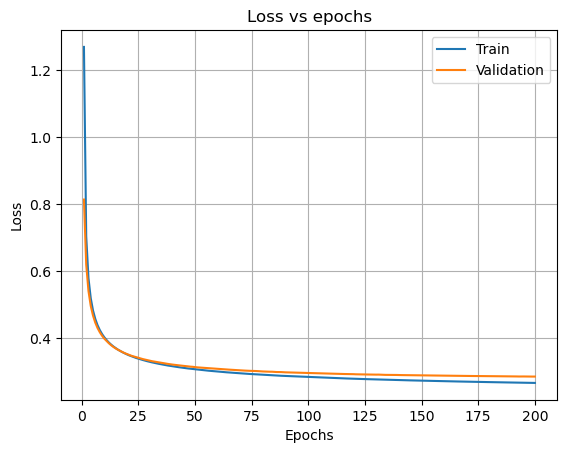

In [195]:
plt.plot(range(1, no_of_epochs + 1), train_loss1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

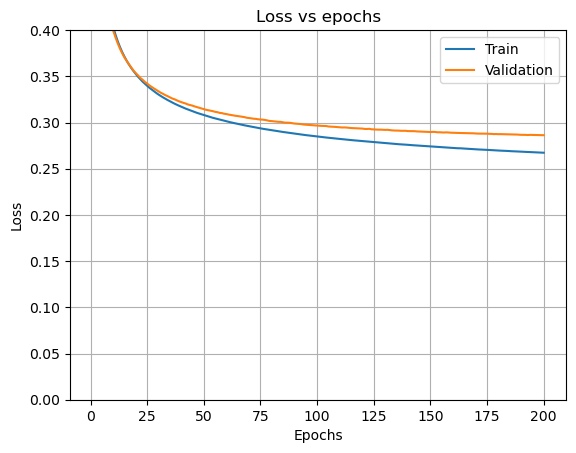

In [196]:
plt.plot(range(1, no_of_epochs + 1), train_loss1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.4)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [197]:
train_accuracy1 = model1.history.history['accuracy']
val_accuracy1 = model1.history.history['val_accuracy']

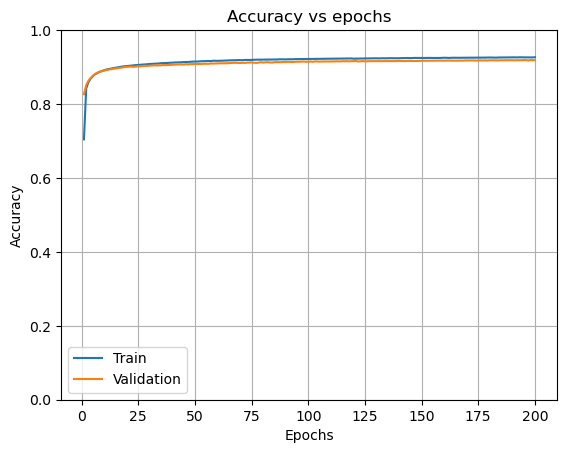

In [198]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

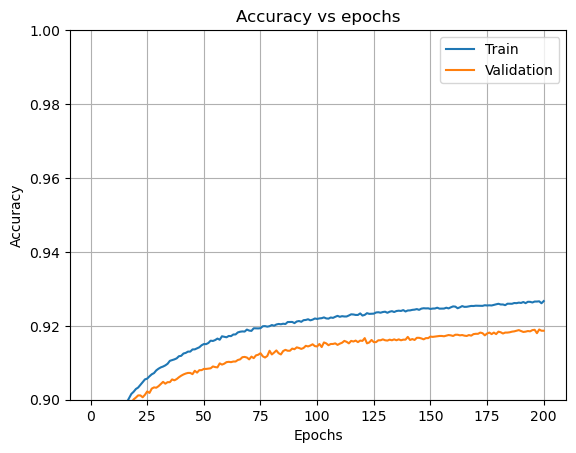

In [199]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy1, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy1, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### There is a bit of overfitting but it is not too much that cant be worked with and this serves as a good benchmark. We will try further to improve this model by fine tuning the neural network.

### Model 2 - One hidden layer with 100 neurons

In [200]:
np.random.seed(123)
model2 = Sequential()
model2.add(Input((784,)))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))
model2.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model2.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 30ms/step - loss: 1.2384 - accuracy: 0.6902 - val_loss: 0.6699 - val_accuracy: 0.8440
Epoch 2/200
48/48 [==============================] - 1s 19ms/step - loss: 0.5609 - accuracy: 0.8602 - val_loss: 0.4801 - val_accuracy: 0.8736
Epoch 3/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4456 - accuracy: 0.8807 - val_loss: 0.4135 - val_accuracy: 0.8882
Epoch 4/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3945 - accuracy: 0.8912 - val_loss: 0.3782 - val_accuracy: 0.8929
Epoch 5/200
48/48 [==============================] - 1s 17ms/step - loss: 0.3639 - accuracy: 0.8989 - val_loss: 0.3527 - val_accuracy: 0.9005
Epoch 6/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3419 - accuracy: 0.9046 - val_loss: 0.3345 - val_accuracy: 0.9047
Epoch 7/200
48/48 [==============================] - 1s 17ms/step - loss: 0.3250 - accuracy: 0.9086 - val_loss: 0.3205 - val_accuracy: 0.9080
Epoch 

48/48 [==============================] - 1s 17ms/step - loss: 0.1233 - accuracy: 0.9661 - val_loss: 0.1431 - val_accuracy: 0.9598
Epoch 59/200
48/48 [==============================] - 1s 22ms/step - loss: 0.1218 - accuracy: 0.9664 - val_loss: 0.1419 - val_accuracy: 0.9605
Epoch 60/200
48/48 [==============================] - 1s 19ms/step - loss: 0.1204 - accuracy: 0.9669 - val_loss: 0.1406 - val_accuracy: 0.9605
Epoch 61/200
48/48 [==============================] - 1s 18ms/step - loss: 0.1191 - accuracy: 0.9672 - val_loss: 0.1404 - val_accuracy: 0.9601
Epoch 62/200
48/48 [==============================] - 1s 19ms/step - loss: 0.1178 - accuracy: 0.9676 - val_loss: 0.1386 - val_accuracy: 0.9605
Epoch 63/200
48/48 [==============================] - 1s 22ms/step - loss: 0.1164 - accuracy: 0.9681 - val_loss: 0.1382 - val_accuracy: 0.9604
Epoch 64/200
48/48 [==============================] - 1s 25ms/step - loss: 0.1151 - accuracy: 0.9686 - val_loss: 0.1370 - val_accuracy: 0.9608
Epoch 65/200

48/48 [==============================] - 1s 19ms/step - loss: 0.0726 - accuracy: 0.9806 - val_loss: 0.1055 - val_accuracy: 0.9682
Epoch 116/200
48/48 [==============================] - 1s 16ms/step - loss: 0.0721 - accuracy: 0.9807 - val_loss: 0.1055 - val_accuracy: 0.9689
Epoch 117/200
48/48 [==============================] - 1s 17ms/step - loss: 0.0715 - accuracy: 0.9807 - val_loss: 0.1047 - val_accuracy: 0.9690
Epoch 118/200
48/48 [==============================] - 1s 16ms/step - loss: 0.0709 - accuracy: 0.9812 - val_loss: 0.1043 - val_accuracy: 0.9698
Epoch 119/200
48/48 [==============================] - 1s 18ms/step - loss: 0.0705 - accuracy: 0.9812 - val_loss: 0.1040 - val_accuracy: 0.9693
Epoch 120/200
48/48 [==============================] - 1s 16ms/step - loss: 0.0700 - accuracy: 0.9814 - val_loss: 0.1037 - val_accuracy: 0.9695
Epoch 121/200
48/48 [==============================] - 1s 15ms/step - loss: 0.0694 - accuracy: 0.9813 - val_loss: 0.1037 - val_accuracy: 0.9690
Epoch 

Epoch 172/200
48/48 [==============================] - 1s 26ms/step - loss: 0.0492 - accuracy: 0.9872 - val_loss: 0.0925 - val_accuracy: 0.9724
Epoch 173/200
48/48 [==============================] - 1s 17ms/step - loss: 0.0489 - accuracy: 0.9872 - val_loss: 0.0922 - val_accuracy: 0.9728
Epoch 174/200
48/48 [==============================] - 1s 15ms/step - loss: 0.0485 - accuracy: 0.9874 - val_loss: 0.0920 - val_accuracy: 0.9723
Epoch 175/200
48/48 [==============================] - 1s 17ms/step - loss: 0.0483 - accuracy: 0.9876 - val_loss: 0.0920 - val_accuracy: 0.9728
Epoch 176/200
48/48 [==============================] - 1s 14ms/step - loss: 0.0480 - accuracy: 0.9875 - val_loss: 0.0916 - val_accuracy: 0.9732
Epoch 177/200
48/48 [==============================] - 1s 14ms/step - loss: 0.0477 - accuracy: 0.9877 - val_loss: 0.0916 - val_accuracy: 0.9724
Epoch 178/200
48/48 [==============================] - 1s 14ms/step - loss: 0.0475 - accuracy: 0.9877 - val_loss: 0.0914 - val_accuracy:

In [201]:
train_loss2 = model2.history.history['loss']
val_loss2 = model2.history.history['val_loss']

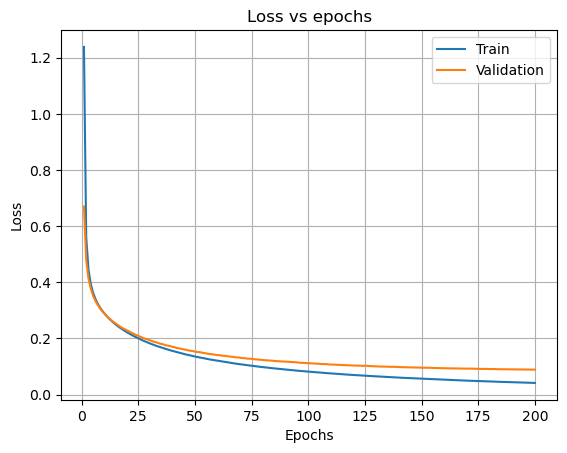

In [202]:
plt.plot(range(1, no_of_epochs + 1), train_loss2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

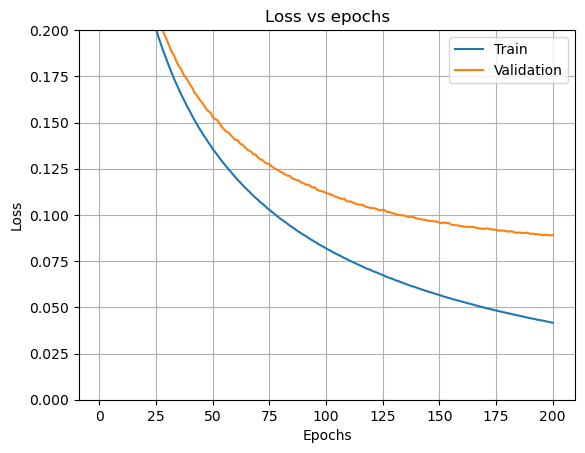

In [203]:
plt.plot(range(1, no_of_epochs + 1), train_loss2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.2)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [204]:
train_accuracy2 = model2.history.history['accuracy']
val_accuracy2 = model2.history.history['val_accuracy']

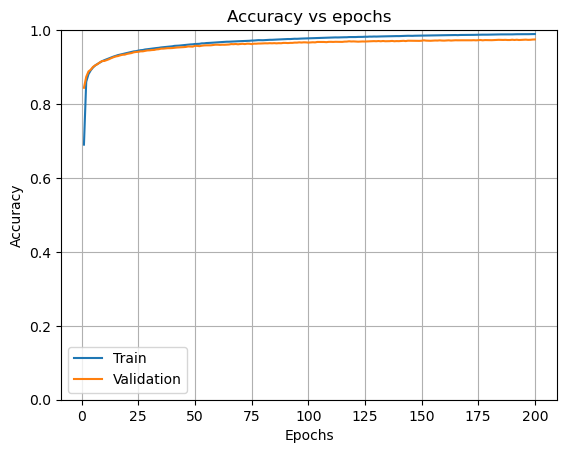

In [205]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

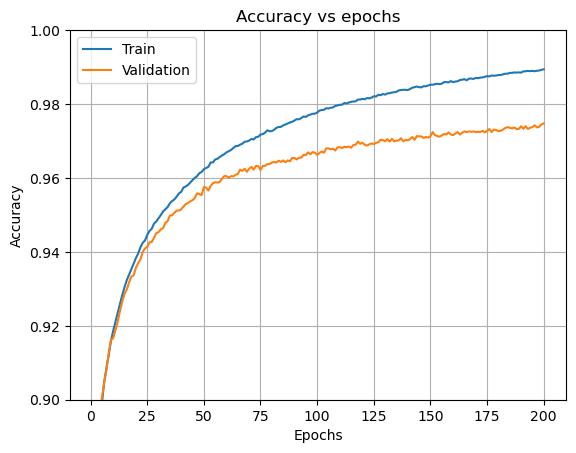

In [206]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy2, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy2, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### The loss has decreased compared to benchmark model while the accuracy has increased indicating towards the importance of adding a hidden layer or how more non-linear features are able to better represent the patterns. But there is a lot of overfitting with this many neurons and it might be benficial to use overfitting techniques. 

#### We could use following techniques to handle overfitting:  
1. Reduce number of neurons in the hidden layer.  
2. Dropout
3. Regularization  
4. Ensembling  

### Model 3 - One hidden layer with lesser number of neurons

In [210]:
np.random.seed(123)
model3 = Sequential()
model3.add(Dense(7, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))
model3.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model3.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 16ms/step - loss: 1.8781 - accuracy: 0.3435 - val_loss: 1.3809 - val_accuracy: 0.5862
Epoch 2/200
48/48 [==============================] - 0s 10ms/step - loss: 1.0464 - accuracy: 0.7105 - val_loss: 0.8103 - val_accuracy: 0.7724
Epoch 3/200
48/48 [==============================] - 0s 10ms/step - loss: 0.7268 - accuracy: 0.7904 - val_loss: 0.6508 - val_accuracy: 0.8093
Epoch 4/200
48/48 [==============================] - 0s 10ms/step - loss: 0.6193 - accuracy: 0.8177 - val_loss: 0.5835 - val_accuracy: 0.8288
Epoch 5/200
48/48 [==============================] - 0s 10ms/step - loss: 0.5670 - accuracy: 0.8329 - val_loss: 0.5456 - val_accuracy: 0.8403
Epoch 6/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5351 - accuracy: 0.8426 - val_loss: 0.5197 - val_accuracy: 0.8487
Epoch 7/200
48/48 [==============================] - 0s 10ms/step - loss: 0.5124 - accuracy: 0.8500 - val_loss: 0.5017 - val_accuracy: 0.8547
Epoch 

48/48 [==============================] - 0s 8ms/step - loss: 0.3082 - accuracy: 0.9137 - val_loss: 0.3244 - val_accuracy: 0.9084
Epoch 59/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3073 - accuracy: 0.9140 - val_loss: 0.3227 - val_accuracy: 0.9084
Epoch 60/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3063 - accuracy: 0.9141 - val_loss: 0.3237 - val_accuracy: 0.9090
Epoch 61/200
48/48 [==============================] - 0s 9ms/step - loss: 0.3056 - accuracy: 0.9146 - val_loss: 0.3219 - val_accuracy: 0.9096
Epoch 62/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3045 - accuracy: 0.9144 - val_loss: 0.3209 - val_accuracy: 0.9108
Epoch 63/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3037 - accuracy: 0.9146 - val_loss: 0.3201 - val_accuracy: 0.9097
Epoch 64/200
48/48 [==============================] - 0s 8ms/step - loss: 0.3031 - accuracy: 0.9153 - val_loss: 0.3209 - val_accuracy: 0.9099
Epoch 65/200
48/48 

48/48 [==============================] - 0s 8ms/step - loss: 0.2793 - accuracy: 0.9222 - val_loss: 0.3059 - val_accuracy: 0.9134
Epoch 116/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2792 - accuracy: 0.9222 - val_loss: 0.3076 - val_accuracy: 0.9133
Epoch 117/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2787 - accuracy: 0.9225 - val_loss: 0.3067 - val_accuracy: 0.9137
Epoch 118/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.9220 - val_loss: 0.3078 - val_accuracy: 0.9132
Epoch 119/200
48/48 [==============================] - 0s 10ms/step - loss: 0.2786 - accuracy: 0.9219 - val_loss: 0.3075 - val_accuracy: 0.9126
Epoch 120/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2779 - accuracy: 0.9224 - val_loss: 0.3055 - val_accuracy: 0.9140
Epoch 121/200
48/48 [==============================] - 0s 9ms/step - loss: 0.2782 - accuracy: 0.9224 - val_loss: 0.3057 - val_accuracy: 0.9137
Epoch 122/20

48/48 [==============================] - 0s 9ms/step - loss: 0.2663 - accuracy: 0.9251 - val_loss: 0.3021 - val_accuracy: 0.9147
Epoch 173/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2665 - accuracy: 0.9247 - val_loss: 0.3030 - val_accuracy: 0.9149
Epoch 174/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2659 - accuracy: 0.9251 - val_loss: 0.3064 - val_accuracy: 0.9118
Epoch 175/200
48/48 [==============================] - 0s 9ms/step - loss: 0.2667 - accuracy: 0.9246 - val_loss: 0.3046 - val_accuracy: 0.9143
Epoch 176/200
48/48 [==============================] - 0s 8ms/step - loss: 0.2663 - accuracy: 0.9247 - val_loss: 0.3016 - val_accuracy: 0.9172
Epoch 177/200
48/48 [==============================] - 0s 10ms/step - loss: 0.2653 - accuracy: 0.9251 - val_loss: 0.3019 - val_accuracy: 0.9154
Epoch 178/200
48/48 [==============================] - 1s 13ms/step - loss: 0.2654 - accuracy: 0.9249 - val_loss: 0.3025 - val_accuracy: 0.9153
Epoch 179/2

In [211]:
train_loss3 = model3.history.history['loss']
val_loss3 = model3.history.history['val_loss']

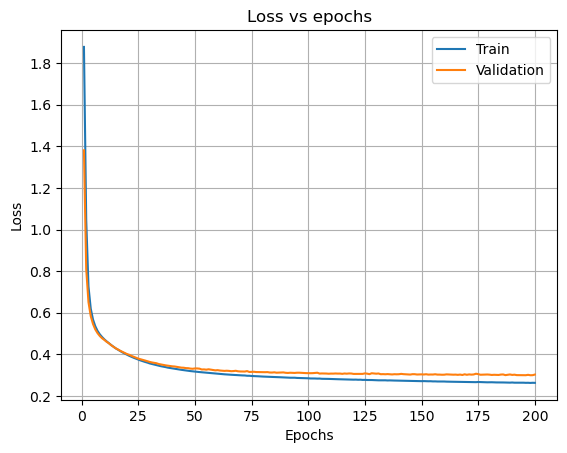

In [212]:
plt.plot(range(1, no_of_epochs + 1), train_loss3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

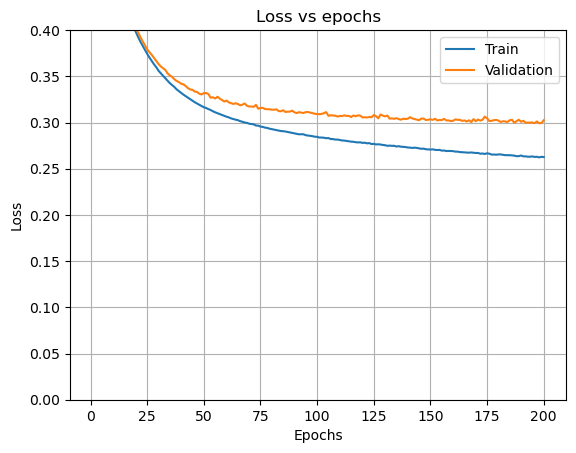

In [217]:
plt.plot(range(1, no_of_epochs + 1), train_loss3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.4)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [214]:
train_accuracy3 = model3.history.history['accuracy']
val_accuracy3 = model3.history.history['val_accuracy']

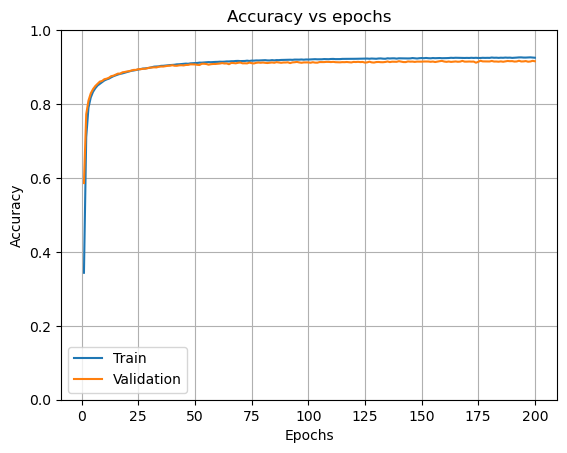

In [215]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

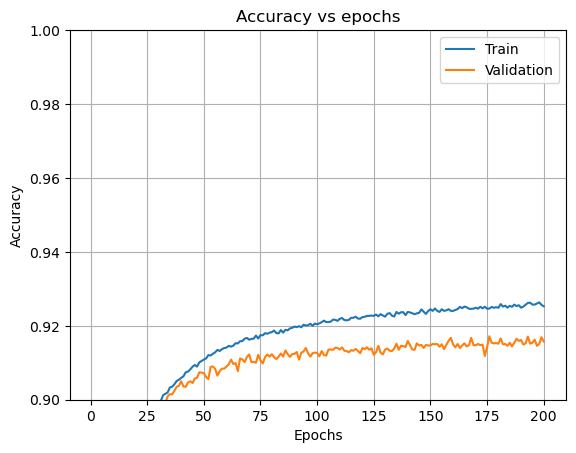

In [216]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy3, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy3, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

There is not as such any improvement compared to the benchmark model.

### Model 4 - One hidden layer with 100 neurons and dropout

In [296]:
np.random.seed(123)
model4 = Sequential()
model4.add(Dense(100, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation = 'softmax'))
model4.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model4.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 4s 50ms/step - loss: 1.3596 - accuracy: 0.6329 - val_loss: 0.7230 - val_accuracy: 0.8415
Epoch 2/200
48/48 [==============================] - 2s 36ms/step - loss: 0.6673 - accuracy: 0.8210 - val_loss: 0.5017 - val_accuracy: 0.8754
Epoch 3/200
48/48 [==============================] - 2s 42ms/step - loss: 0.5296 - accuracy: 0.8530 - val_loss: 0.4267 - val_accuracy: 0.8890
Epoch 4/200
48/48 [==============================] - 1s 21ms/step - loss: 0.4702 - accuracy: 0.8676 - val_loss: 0.3875 - val_accuracy: 0.8961
Epoch 5/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4323 - accuracy: 0.8760 - val_loss: 0.3611 - val_accuracy: 0.9018
Epoch 6/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4065 - accuracy: 0.8835 - val_loss: 0.3419 - val_accuracy: 0.9064
Epoch 7/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3864 - accuracy: 0.8902 - val_loss: 0.3267 - val_accuracy: 0.9097
Epoch 

48/48 [==============================] - 2s 39ms/step - loss: 0.1578 - accuracy: 0.9556 - val_loss: 0.1439 - val_accuracy: 0.9586
Epoch 59/200
48/48 [==============================] - 1s 23ms/step - loss: 0.1565 - accuracy: 0.9553 - val_loss: 0.1433 - val_accuracy: 0.9587
Epoch 60/200
48/48 [==============================] - 2s 50ms/step - loss: 0.1550 - accuracy: 0.9560 - val_loss: 0.1419 - val_accuracy: 0.9582
Epoch 61/200
48/48 [==============================] - 1s 29ms/step - loss: 0.1537 - accuracy: 0.9553 - val_loss: 0.1410 - val_accuracy: 0.9585
Epoch 62/200
48/48 [==============================] - 1s 30ms/step - loss: 0.1523 - accuracy: 0.9563 - val_loss: 0.1402 - val_accuracy: 0.9592
Epoch 63/200
48/48 [==============================] - 1s 31ms/step - loss: 0.1530 - accuracy: 0.9566 - val_loss: 0.1395 - val_accuracy: 0.9596
Epoch 64/200
48/48 [==============================] - 2s 34ms/step - loss: 0.1490 - accuracy: 0.9579 - val_loss: 0.1382 - val_accuracy: 0.9595
Epoch 65/200

48/48 [==============================] - 1s 20ms/step - loss: 0.1092 - accuracy: 0.9684 - val_loss: 0.1107 - val_accuracy: 0.9668
Epoch 116/200
48/48 [==============================] - 1s 20ms/step - loss: 0.1099 - accuracy: 0.9681 - val_loss: 0.1102 - val_accuracy: 0.9668
Epoch 117/200
48/48 [==============================] - 1s 24ms/step - loss: 0.1096 - accuracy: 0.9684 - val_loss: 0.1096 - val_accuracy: 0.9676
Epoch 118/200
48/48 [==============================] - 1s 18ms/step - loss: 0.1058 - accuracy: 0.9696 - val_loss: 0.1095 - val_accuracy: 0.9665
Epoch 119/200
48/48 [==============================] - 1s 20ms/step - loss: 0.1056 - accuracy: 0.9697 - val_loss: 0.1090 - val_accuracy: 0.9672
Epoch 120/200
48/48 [==============================] - 1s 21ms/step - loss: 0.1057 - accuracy: 0.9690 - val_loss: 0.1087 - val_accuracy: 0.9674
Epoch 121/200
48/48 [==============================] - 1s 20ms/step - loss: 0.1054 - accuracy: 0.9699 - val_loss: 0.1086 - val_accuracy: 0.9674
Epoch 

Epoch 172/200
48/48 [==============================] - 1s 22ms/step - loss: 0.0860 - accuracy: 0.9755 - val_loss: 0.0969 - val_accuracy: 0.9712
Epoch 173/200
48/48 [==============================] - 1s 22ms/step - loss: 0.0856 - accuracy: 0.9755 - val_loss: 0.0965 - val_accuracy: 0.9708
Epoch 174/200
48/48 [==============================] - 1s 21ms/step - loss: 0.0856 - accuracy: 0.9748 - val_loss: 0.0962 - val_accuracy: 0.9714
Epoch 175/200
48/48 [==============================] - 1s 21ms/step - loss: 0.0855 - accuracy: 0.9747 - val_loss: 0.0969 - val_accuracy: 0.9714
Epoch 176/200
48/48 [==============================] - 1s 21ms/step - loss: 0.0843 - accuracy: 0.9758 - val_loss: 0.0961 - val_accuracy: 0.9708
Epoch 177/200
48/48 [==============================] - 1s 22ms/step - loss: 0.0840 - accuracy: 0.9749 - val_loss: 0.0958 - val_accuracy: 0.9709
Epoch 178/200
48/48 [==============================] - 1s 24ms/step - loss: 0.0845 - accuracy: 0.9757 - val_loss: 0.0959 - val_accuracy:

In [297]:
train_loss4= model4.history.history['loss']
val_loss4 = model4.history.history['val_loss']

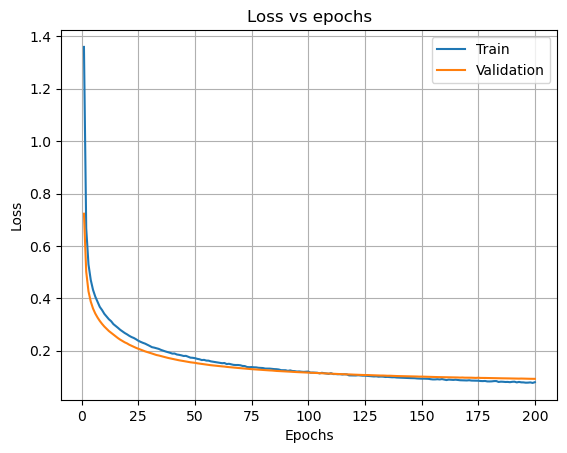

In [299]:
plt.plot(range(1, no_of_epochs + 1), train_loss4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

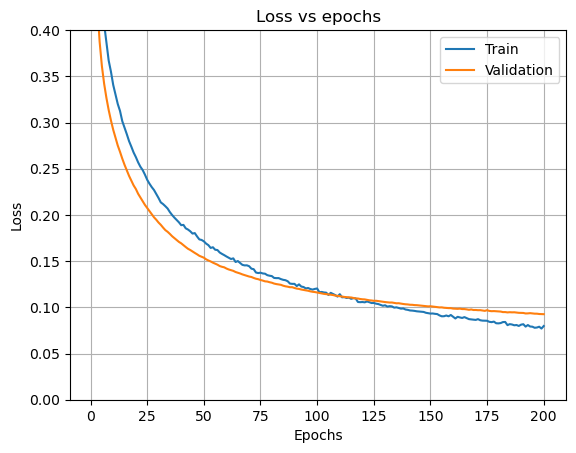

In [300]:
plt.plot(range(1, no_of_epochs + 1), train_loss4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.4)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [301]:
train_accuracy4 = model4.history.history['accuracy']
val_accuracy4 = model4.history.history['val_accuracy']

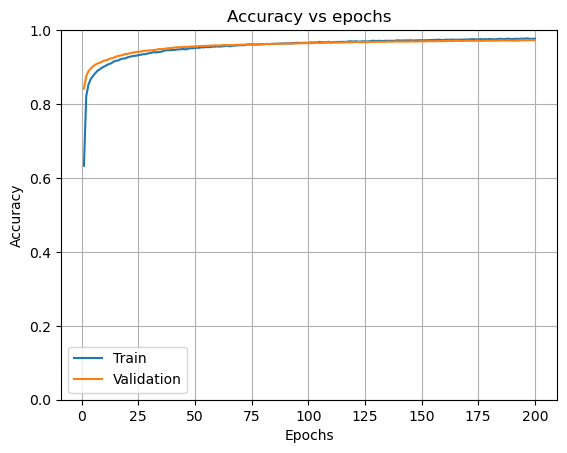

In [302]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

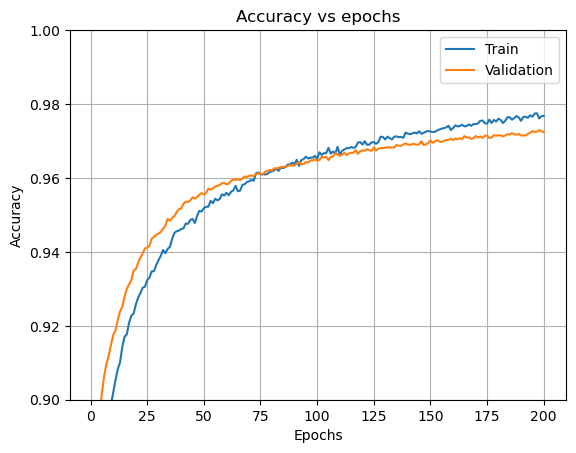

In [303]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy4, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy4, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### There is no overfitting and we are able to achieve much better accuracy compared to benchmark model

### Model 5 - One hidden layer with 100 neurons and regularization

In [309]:
np.random.seed(123)
model5 = Sequential()
model5.add(Dense(100, activation = 'relu', kernel_regularizer = L1L2(l1=0.001, l2=0)))
model5.add(Dense(10, activation = 'softmax'))
model5.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model5.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/200
48/48 [==============================] - 2s 29ms/step - loss: 4.3048 - accuracy: 0.7056 - val_loss: 3.5900 - val_accuracy: 0.8466
Epoch 2/200
48/48 [==============================] - 1s 18ms/step - loss: 3.3252 - accuracy: 0.8622 - val_loss: 3.0860 - val_accuracy: 0.8758
Epoch 3/200
48/48 [==============================] - 1s 16ms/step - loss: 2.9059 - accuracy: 0.8813 - val_loss: 2.7235 - val_accuracy: 0.8860
Epoch 4/200
48/48 [==============================] - 1s 17ms/step - loss: 2.5694 - accuracy: 0.8904 - val_loss: 2.4112 - val_accuracy: 0.8936
Epoch 5/200
48/48 [==============================] - 2s 38ms/step - loss: 2.2733 - accuracy: 0.8963 - val_loss: 2.1326 - val_accuracy: 0.8970
Epoch 6/200
48/48 [==============================] - 1s 27ms/step - loss: 2.0084 - accuracy: 0.9010 - val_loss: 1.8826 - val_accuracy: 0.9006
Epoch 7/200
48/48 [==============================] - 1s 24ms/step - loss: 1.7712 - accuracy: 0.9032 - val_loss: 1.6595 - val_accuracy: 0.9047
Epoch 

48/48 [==============================] - 1s 18ms/step - loss: 0.4295 - accuracy: 0.9289 - val_loss: 0.4283 - val_accuracy: 0.9259
Epoch 59/200
48/48 [==============================] - 1s 19ms/step - loss: 0.4275 - accuracy: 0.9286 - val_loss: 0.4287 - val_accuracy: 0.9287
Epoch 60/200
48/48 [==============================] - 1s 19ms/step - loss: 0.4252 - accuracy: 0.9293 - val_loss: 0.4259 - val_accuracy: 0.9289
Epoch 61/200
48/48 [==============================] - 1s 19ms/step - loss: 0.4233 - accuracy: 0.9303 - val_loss: 0.4264 - val_accuracy: 0.9272
Epoch 62/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4227 - accuracy: 0.9298 - val_loss: 0.4262 - val_accuracy: 0.9266
Epoch 63/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4207 - accuracy: 0.9301 - val_loss: 0.4204 - val_accuracy: 0.9289
Epoch 64/200
48/48 [==============================] - 1s 18ms/step - loss: 0.4184 - accuracy: 0.9307 - val_loss: 0.4183 - val_accuracy: 0.9282
Epoch 65/200

48/48 [==============================] - 1s 18ms/step - loss: 0.3588 - accuracy: 0.9413 - val_loss: 0.3633 - val_accuracy: 0.9382
Epoch 116/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3590 - accuracy: 0.9415 - val_loss: 0.3623 - val_accuracy: 0.9393
Epoch 117/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3567 - accuracy: 0.9426 - val_loss: 0.3636 - val_accuracy: 0.9392
Epoch 118/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3573 - accuracy: 0.9421 - val_loss: 0.3609 - val_accuracy: 0.9383
Epoch 119/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3569 - accuracy: 0.9417 - val_loss: 0.3658 - val_accuracy: 0.9377
Epoch 120/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3557 - accuracy: 0.9419 - val_loss: 0.3647 - val_accuracy: 0.9389
Epoch 121/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3541 - accuracy: 0.9422 - val_loss: 0.3647 - val_accuracy: 0.9398
Epoch 

Epoch 172/200
48/48 [==============================] - 1s 18ms/step - loss: 0.3264 - accuracy: 0.9470 - val_loss: 0.3360 - val_accuracy: 0.9431
Epoch 173/200
48/48 [==============================] - 1s 28ms/step - loss: 0.3284 - accuracy: 0.9466 - val_loss: 0.3345 - val_accuracy: 0.9414
Epoch 174/200
48/48 [==============================] - 1s 27ms/step - loss: 0.3300 - accuracy: 0.9464 - val_loss: 0.3358 - val_accuracy: 0.9424
Epoch 175/200
48/48 [==============================] - 2s 46ms/step - loss: 0.3252 - accuracy: 0.9472 - val_loss: 0.3359 - val_accuracy: 0.9441
Epoch 176/200
48/48 [==============================] - 2s 36ms/step - loss: 0.3262 - accuracy: 0.9473 - val_loss: 0.3357 - val_accuracy: 0.9413
Epoch 177/200
48/48 [==============================] - 1s 29ms/step - loss: 0.3261 - accuracy: 0.9472 - val_loss: 0.3336 - val_accuracy: 0.9420
Epoch 178/200
48/48 [==============================] - 1s 28ms/step - loss: 0.3262 - accuracy: 0.9468 - val_loss: 0.3383 - val_accuracy:

In [310]:
train_loss5 = model5.history.history['loss']
val_loss5 = model5.history.history['val_loss']

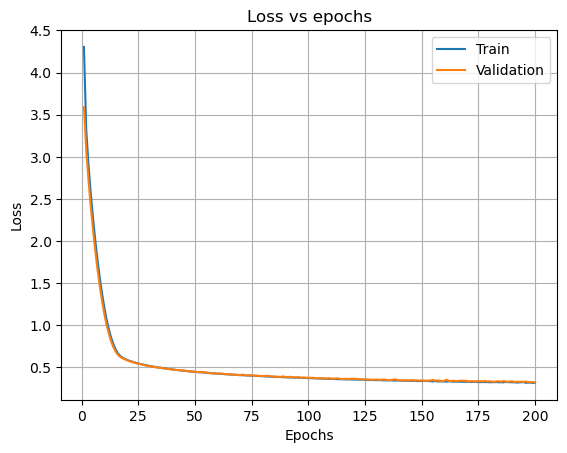

In [311]:
plt.plot(range(1, no_of_epochs + 1), train_loss5, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss5, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [312]:
train_accuracy5 = model5.history.history['accuracy']
val_accuracy5 = model5.history.history['val_accuracy']

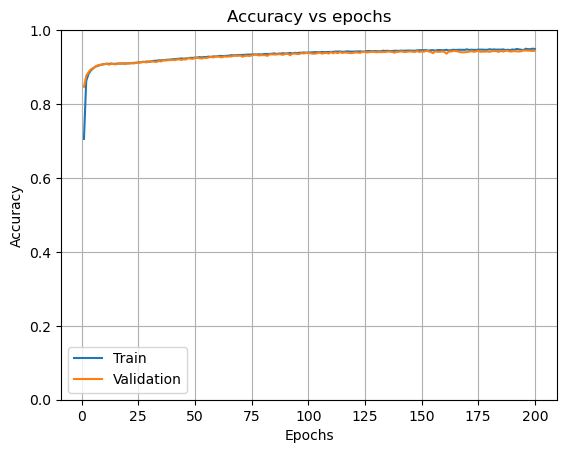

In [313]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy5, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy5, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### Looks like the mdoel with dropout is giving us the best results. We will tak ethat model and do further refinement on batch size, learning rate and number of epochs to  find an optimal model

### Model 6 - One hidden layer with 100 neurons, dropout and further fine tuning

In [333]:
no_of_epochs = 300
batch_size = 5000
learning_rate = 0.5

In [334]:
np.random.seed(123)
model6 = Sequential()
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation = 'softmax'))
model6.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
model6.fit(x_train_partial_norm, y_train_partial, validation_data = (x_val_norm, y_val), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/300
10/10 [==============================] - 2s 129ms/step - loss: 1.5125 - accuracy: 0.5476 - val_loss: 0.8191 - val_accuracy: 0.7703
Epoch 2/300
10/10 [==============================] - 1s 73ms/step - loss: 0.7791 - accuracy: 0.7616 - val_loss: 0.5221 - val_accuracy: 0.8530
Epoch 3/300
10/10 [==============================] - 1s 72ms/step - loss: 0.5460 - accuracy: 0.8341 - val_loss: 0.4623 - val_accuracy: 0.8640
Epoch 4/300
10/10 [==============================] - 1s 78ms/step - loss: 0.4803 - accuracy: 0.8585 - val_loss: 0.3820 - val_accuracy: 0.8926
Epoch 5/300
10/10 [==============================] - 1s 74ms/step - loss: 0.4198 - accuracy: 0.8785 - val_loss: 0.3531 - val_accuracy: 0.8979
Epoch 6/300
10/10 [==============================] - 1s 74ms/step - loss: 0.3905 - accuracy: 0.8879 - val_loss: 0.3315 - val_accuracy: 0.9057
Epoch 7/300
10/10 [==============================] - 1s 74ms/step - loss: 0.3669 - accuracy: 0.8946 - val_loss: 0.3133 - val_accuracy: 0.9122
Epoch

10/10 [==============================] - 1s 82ms/step - loss: 0.1488 - accuracy: 0.9573 - val_loss: 0.1388 - val_accuracy: 0.9598
Epoch 59/300
10/10 [==============================] - 1s 86ms/step - loss: 0.1478 - accuracy: 0.9581 - val_loss: 0.1398 - val_accuracy: 0.9587
Epoch 60/300
10/10 [==============================] - 1s 80ms/step - loss: 0.1473 - accuracy: 0.9574 - val_loss: 0.1368 - val_accuracy: 0.9597
Epoch 61/300
10/10 [==============================] - 1s 82ms/step - loss: 0.1443 - accuracy: 0.9592 - val_loss: 0.1366 - val_accuracy: 0.9596
Epoch 62/300
10/10 [==============================] - 1s 82ms/step - loss: 0.1442 - accuracy: 0.9592 - val_loss: 0.1359 - val_accuracy: 0.9605
Epoch 63/300
10/10 [==============================] - 1s 78ms/step - loss: 0.1444 - accuracy: 0.9596 - val_loss: 0.1344 - val_accuracy: 0.9607
Epoch 64/300
10/10 [==============================] - 1s 79ms/step - loss: 0.1433 - accuracy: 0.9577 - val_loss: 0.1337 - val_accuracy: 0.9612
Epoch 65/300

10/10 [==============================] - 1s 68ms/step - loss: 0.1040 - accuracy: 0.9698 - val_loss: 0.1070 - val_accuracy: 0.9685
Epoch 116/300
10/10 [==============================] - 1s 70ms/step - loss: 0.1031 - accuracy: 0.9703 - val_loss: 0.1067 - val_accuracy: 0.9683
Epoch 117/300
10/10 [==============================] - 1s 68ms/step - loss: 0.1043 - accuracy: 0.9700 - val_loss: 0.1062 - val_accuracy: 0.9688
Epoch 118/300
10/10 [==============================] - 1s 68ms/step - loss: 0.1032 - accuracy: 0.9703 - val_loss: 0.1061 - val_accuracy: 0.9686
Epoch 119/300
10/10 [==============================] - 1s 68ms/step - loss: 0.1022 - accuracy: 0.9706 - val_loss: 0.1059 - val_accuracy: 0.9692
Epoch 120/300
10/10 [==============================] - 1s 68ms/step - loss: 0.1010 - accuracy: 0.9708 - val_loss: 0.1060 - val_accuracy: 0.9683
Epoch 121/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0990 - accuracy: 0.9713 - val_loss: 0.1049 - val_accuracy: 0.9686
Epoch 

Epoch 172/300
10/10 [==============================] - 1s 70ms/step - loss: 0.0810 - accuracy: 0.9758 - val_loss: 0.0943 - val_accuracy: 0.9707
Epoch 173/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.0946 - val_accuracy: 0.9707
Epoch 174/300
10/10 [==============================] - 1s 77ms/step - loss: 0.0808 - accuracy: 0.9756 - val_loss: 0.0946 - val_accuracy: 0.9702
Epoch 175/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0814 - accuracy: 0.9757 - val_loss: 0.0943 - val_accuracy: 0.9703
Epoch 176/300
10/10 [==============================] - 1s 67ms/step - loss: 0.0807 - accuracy: 0.9762 - val_loss: 0.0945 - val_accuracy: 0.9707
Epoch 177/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0799 - accuracy: 0.9760 - val_loss: 0.0939 - val_accuracy: 0.9711
Epoch 178/300
10/10 [==============================] - 1s 69ms/step - loss: 0.0785 - accuracy: 0.9772 - val_loss: 0.0940 - val_accuracy:

Epoch 229/300
10/10 [==============================] - 1s 70ms/step - loss: 0.0691 - accuracy: 0.9798 - val_loss: 0.0883 - val_accuracy: 0.9722
Epoch 230/300
10/10 [==============================] - 1s 67ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0882 - val_accuracy: 0.9718
Epoch 231/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0681 - accuracy: 0.9795 - val_loss: 0.0878 - val_accuracy: 0.9720
Epoch 232/300
10/10 [==============================] - 1s 70ms/step - loss: 0.0683 - accuracy: 0.9805 - val_loss: 0.0876 - val_accuracy: 0.9715
Epoch 233/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0662 - accuracy: 0.9803 - val_loss: 0.0877 - val_accuracy: 0.9722
Epoch 234/300
10/10 [==============================] - 1s 67ms/step - loss: 0.0691 - accuracy: 0.9795 - val_loss: 0.0878 - val_accuracy: 0.9718
Epoch 235/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0671 - accuracy: 0.9808 - val_loss: 0.0880 - val_accuracy:

Epoch 286/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0593 - accuracy: 0.9826 - val_loss: 0.0843 - val_accuracy: 0.9732
Epoch 287/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0587 - accuracy: 0.9827 - val_loss: 0.0845 - val_accuracy: 0.9729
Epoch 288/300
10/10 [==============================] - 1s 67ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0846 - val_accuracy: 0.9723
Epoch 289/300
10/10 [==============================] - 1s 69ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.0841 - val_accuracy: 0.9729
Epoch 290/300
10/10 [==============================] - 1s 68ms/step - loss: 0.0578 - accuracy: 0.9831 - val_loss: 0.0846 - val_accuracy: 0.9729
Epoch 291/300
10/10 [==============================] - 1s 72ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0842 - val_accuracy: 0.9732
Epoch 292/300
10/10 [==============================] - 1s 76ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0840 - val_accuracy:

In [335]:
train_loss6= model6.history.history['loss']
val_loss6 = model6.history.history['val_loss']

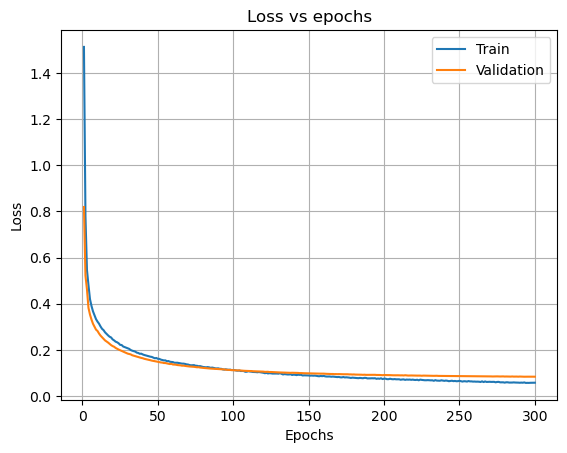

In [336]:
plt.plot(range(1, no_of_epochs + 1), train_loss6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

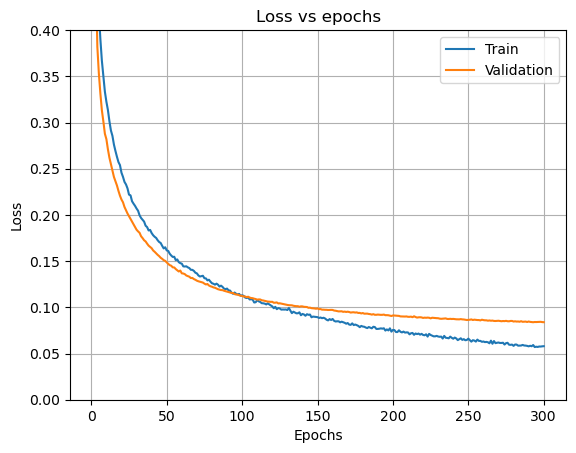

In [337]:
plt.plot(range(1, no_of_epochs + 1), train_loss6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_loss6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.4)
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [338]:
train_accuracy6 = model6.history.history['accuracy']
val_accuracy6 = model6.history.history['val_accuracy']

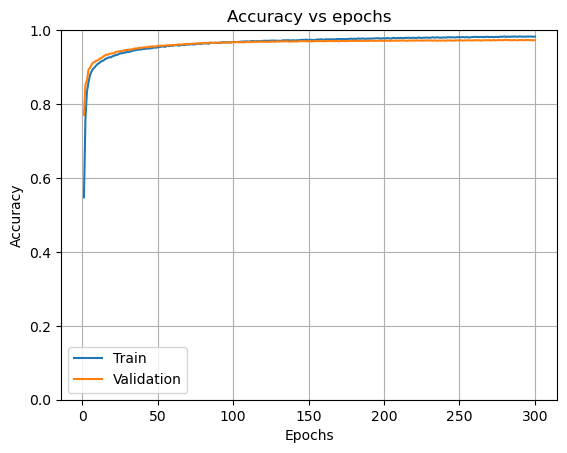

In [339]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

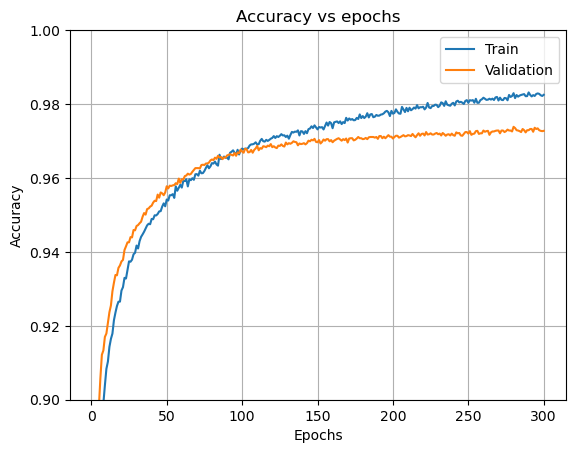

In [340]:
plt.plot(range(1, no_of_epochs + 1), train_accuracy6, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), val_accuracy6, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

#### There is no sign of sever overfitting and the accuracy is very good. We choose this as ourfinal model, train on our train set and evaluate on test set.

# Final Model

In [341]:
no_of_epochs = 300
batch_size = 5000
learning_rate = 0.5

In [342]:
final_scaler = MinMaxScaler()
x_train_norm = final_scaler.fit_transform(x_train_reshape)
x_test_norm = final_scaler.transform(x_test_reshape)

In [343]:
np.random.seed(123)
final_model = Sequential()
final_model.add(Dense(100, activation = 'relu'))
final_model.add(Dropout(0.2))
final_model.add(Dense(10, activation = 'softmax'))
final_model.compile(optimizer = SGD(learning_rate), loss = 'categorical_crossentropy', metrics = 'accuracy')
final_model.fit(x_train_norm, y_train_ohe, validation_data = (x_test_norm, y_test_ohe), epochs = no_of_epochs, batch_size = batch_size, use_multiprocessing = True)

Epoch 1/300
12/12 [==============================] - 2s 107ms/step - loss: 1.4286 - accuracy: 0.5663 - val_loss: 0.8460 - val_accuracy: 0.7644
Epoch 2/300
12/12 [==============================] - 1s 78ms/step - loss: 0.7340 - accuracy: 0.7747 - val_loss: 0.5568 - val_accuracy: 0.8257
Epoch 3/300
12/12 [==============================] - 1s 100ms/step - loss: 0.5156 - accuracy: 0.8464 - val_loss: 0.3834 - val_accuracy: 0.8958
Epoch 4/300
12/12 [==============================] - 1s 94ms/step - loss: 0.4333 - accuracy: 0.8748 - val_loss: 0.3498 - val_accuracy: 0.9043
Epoch 5/300
12/12 [==============================] - 1s 102ms/step - loss: 0.4037 - accuracy: 0.8831 - val_loss: 0.3192 - val_accuracy: 0.9108
Epoch 6/300
12/12 [==============================] - 1s 107ms/step - loss: 0.3749 - accuracy: 0.8913 - val_loss: 0.2993 - val_accuracy: 0.9159
Epoch 7/300
12/12 [==============================] - 1s 92ms/step - loss: 0.3540 - accuracy: 0.8975 - val_loss: 0.2835 - val_accuracy: 0.9206
Ep

12/12 [==============================] - 1s 77ms/step - loss: 0.1426 - accuracy: 0.9594 - val_loss: 0.1172 - val_accuracy: 0.9662
Epoch 59/300
12/12 [==============================] - 1s 77ms/step - loss: 0.1411 - accuracy: 0.9598 - val_loss: 0.1159 - val_accuracy: 0.9658
Epoch 60/300
12/12 [==============================] - 1s 93ms/step - loss: 0.1391 - accuracy: 0.9602 - val_loss: 0.1151 - val_accuracy: 0.9661
Epoch 61/300
12/12 [==============================] - 1s 101ms/step - loss: 0.1390 - accuracy: 0.9603 - val_loss: 0.1146 - val_accuracy: 0.9666
Epoch 62/300
12/12 [==============================] - 1s 116ms/step - loss: 0.1379 - accuracy: 0.9607 - val_loss: 0.1134 - val_accuracy: 0.9670
Epoch 63/300
12/12 [==============================] - 1s 107ms/step - loss: 0.1365 - accuracy: 0.9609 - val_loss: 0.1127 - val_accuracy: 0.9665
Epoch 64/300
12/12 [==============================] - 1s 124ms/step - loss: 0.1339 - accuracy: 0.9615 - val_loss: 0.1119 - val_accuracy: 0.9672
Epoch 65

12/12 [==============================] - 1s 110ms/step - loss: 0.0983 - accuracy: 0.9713 - val_loss: 0.0875 - val_accuracy: 0.9729
Epoch 116/300
12/12 [==============================] - 1s 111ms/step - loss: 0.0995 - accuracy: 0.9709 - val_loss: 0.0873 - val_accuracy: 0.9733
Epoch 117/300
12/12 [==============================] - 2s 169ms/step - loss: 0.0976 - accuracy: 0.9712 - val_loss: 0.0876 - val_accuracy: 0.9732
Epoch 118/300
12/12 [==============================] - 2s 138ms/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.0865 - val_accuracy: 0.9733
Epoch 119/300
12/12 [==============================] - 2s 167ms/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.0865 - val_accuracy: 0.9737
Epoch 120/300
12/12 [==============================] - 1s 115ms/step - loss: 0.0967 - accuracy: 0.9714 - val_loss: 0.0867 - val_accuracy: 0.9735
Epoch 121/300
12/12 [==============================] - 1s 104ms/step - loss: 0.0959 - accuracy: 0.9718 - val_loss: 0.0862 - val_accuracy: 0.9734

Epoch 172/300
12/12 [==============================] - 1s 86ms/step - loss: 0.0784 - accuracy: 0.9772 - val_loss: 0.0761 - val_accuracy: 0.9761
Epoch 173/300
12/12 [==============================] - 1s 77ms/step - loss: 0.0782 - accuracy: 0.9765 - val_loss: 0.0760 - val_accuracy: 0.9760
Epoch 174/300
12/12 [==============================] - 1s 80ms/step - loss: 0.0775 - accuracy: 0.9766 - val_loss: 0.0757 - val_accuracy: 0.9760
Epoch 175/300
12/12 [==============================] - 1s 80ms/step - loss: 0.0766 - accuracy: 0.9771 - val_loss: 0.0757 - val_accuracy: 0.9762
Epoch 176/300
12/12 [==============================] - 1s 82ms/step - loss: 0.0765 - accuracy: 0.9778 - val_loss: 0.0755 - val_accuracy: 0.9760
Epoch 177/300
12/12 [==============================] - 1s 79ms/step - loss: 0.0771 - accuracy: 0.9767 - val_loss: 0.0751 - val_accuracy: 0.9762
Epoch 178/300
12/12 [==============================] - 1s 90ms/step - loss: 0.0780 - accuracy: 0.9768 - val_loss: 0.0749 - val_accuracy:

Epoch 229/300
12/12 [==============================] - 1s 101ms/step - loss: 0.0643 - accuracy: 0.9805 - val_loss: 0.0704 - val_accuracy: 0.9783
Epoch 230/300
12/12 [==============================] - 1s 95ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0700 - val_accuracy: 0.9784
Epoch 231/300
12/12 [==============================] - 1s 88ms/step - loss: 0.0650 - accuracy: 0.9808 - val_loss: 0.0699 - val_accuracy: 0.9780
Epoch 232/300
12/12 [==============================] - 1s 87ms/step - loss: 0.0657 - accuracy: 0.9806 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 233/300
12/12 [==============================] - 1s 86ms/step - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0695 - val_accuracy: 0.9781
Epoch 234/300
12/12 [==============================] - 1s 95ms/step - loss: 0.0647 - accuracy: 0.9808 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 235/300
12/12 [==============================] - 2s 128ms/step - loss: 0.0633 - accuracy: 0.9814 - val_loss: 0.0696 - val_accurac

Epoch 286/300
12/12 [==============================] - 1s 79ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0673 - val_accuracy: 0.9790
Epoch 287/300
12/12 [==============================] - 1s 79ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0670 - val_accuracy: 0.9786
Epoch 288/300
12/12 [==============================] - 1s 84ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 289/300
12/12 [==============================] - 1s 79ms/step - loss: 0.0558 - accuracy: 0.9832 - val_loss: 0.0673 - val_accuracy: 0.9789
Epoch 290/300
12/12 [==============================] - 1s 94ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 291/300
12/12 [==============================] - 1s 94ms/step - loss: 0.0556 - accuracy: 0.9834 - val_loss: 0.0670 - val_accuracy: 0.9794
Epoch 292/300
12/12 [==============================] - 1s 84ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0673 - val_accuracy:

In [344]:
final_train_loss= final_model.history.history['loss']
final_test_loss = final_model.history.history['val_loss']

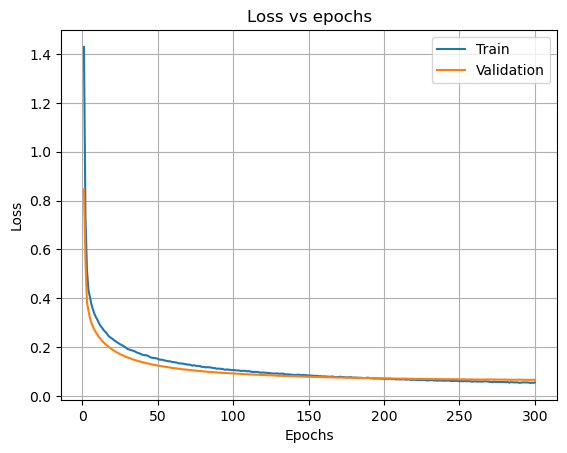

In [345]:
plt.plot(range(1, no_of_epochs + 1), final_train_loss, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), final_test_loss, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss vs epochs');

In [346]:
final_train_accuracy = final_model.history.history['accuracy']
final_test_accuracy = final_model.history.history['val_accuracy']

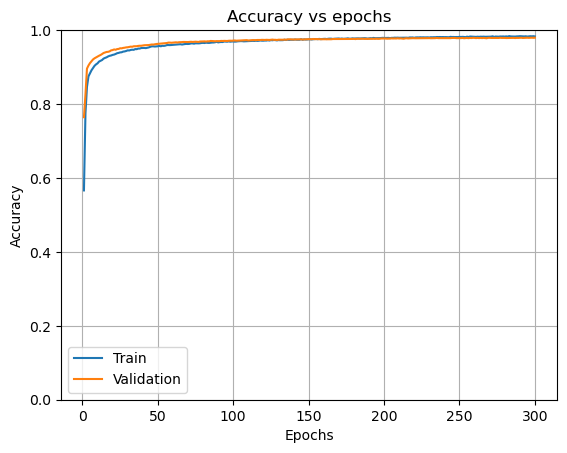

In [347]:
plt.plot(range(1, no_of_epochs + 1), final_train_accuracy, label = 'Train')
plt.plot(range(1, no_of_epochs + 1), final_test_accuracy, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.title('Accuracy vs epochs');
plt.legend();

In [348]:
def make_predictions(model, input_data, scaler):
    '''
    Description:
    Using a neural network the model makes predictions on the same
    Inputs:
    model: Neural network model
    input_data: 2D array of one or more records arranged along rows non-normalized
    Output:
    A 2d array with predictions of class for each record
    '''
    input_data_norm = scaler.transform(input_data)
    return np.argmax(model.predict(input_data_norm), axis = 1)

In [349]:
make_predictions(final_model, x_test_reshape, final_scaler)

313/313 [==============================] - 2s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [350]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)